In [428]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Setting required paths related to library functions
POPPLER_PATH = r"c:\Users\canet\Downloads\Release-24.08.0-0\poppler-24.08.0\Library\bin"
TESSERACT_ENGINE_PATH = r"c:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = TESSERACT_ENGINE_PATH

In [429]:
def preprocess_image(image_path: str) -> np.ndarray:

    # Load the image using PIL and convert to OpenCV format
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
    
    # Resize image for better OCR accuracy
    resized = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    
    # Apply Adaptive Thresholding for sharper text
    processed_image = cv2.adaptiveThreshold(
        resized,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        63,  # Block size - the size of the local region for threshold calculation
        12   # Constant subtracted from the mean (Trial & Error Adjustment)
    )
    
    # Display original and preprocessed images side-by-side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    
    plt.show()
    
    return processed_image

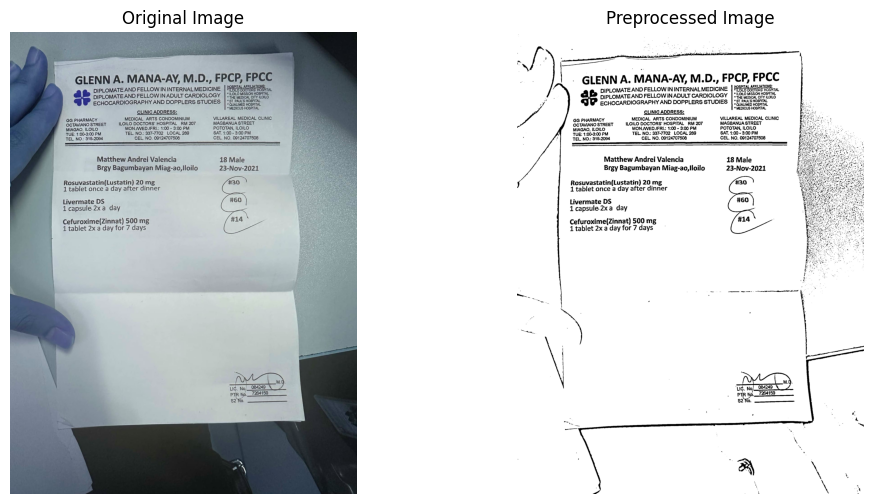

Extracted Text:
CLINIC ADDRESS:

MEDICAL ARTS CONDOMINIUM

GG PHARMACY

OCTAVIANO STREET ILOILO DOCTORS’ HOSPITAL RM 207

MIAGAO, ILOILO MON.WED.J/FRI.: 1:00 - 3:00 PM
TEL. NO.: 337-7702 LOCAL 289

TUE: 1:00-3:00 PM

TEL NO.: 315-2094 CEL. NO. 09124707508

Matthew Andrei Valencia
Brgy Bagumbayan Miag-ao, lloilo

Rosuvastatin(Lustatin) 20 mg
1 tablet once a day after dinner

Livermate DS
1 capsula2xa day

Cefuroxime(Zinnat) 500 mg
1 tablet 2x a day for 7 days

_ GLENN A. MANA-AY, M.D., FPCP, FPCC
DIPLOMATE AND FELLOW IN INTERNAL MEDICINE Rca BectONS HSSITAL

DIPLOMATE AND FELLOW IN ADULT CARDIOLOGY | :HOLoMssion Omar
ECHOCARDIOGRAPHY AND DOPPLERS STUDIES | ;s1,Paus HosrrTAL

* ST. PAUL'S HOSPITAL

* MEDICUS HOSPITAL
VILLAREAL MEDICAL CLINIC
MAGBANUA STREET
POTOTAN, ILOILO

SAT. 1:00 - 3:00 PM
CEL. NO. 08124707508

18 Male
23-Nov-2021

#30

#60

#14




In [430]:
def extract_text_from_printed(image: np.ndarray) -> str:

    try:
        # Use Tesseract to extract text from the preprocessed image
        extracted_text = pytesseract.image_to_string(image)
        return extracted_text
    except Exception as e:
        return f"An error occurred: {e}"
    
    
image_path = r"C:\Users\canet\Documents\3rd Year\prescription_app\inputs\pre_1.jpg"

# Preprocess the image and display results
processed_image = preprocess_image(image_path)

# Extract text from the preprocessed image
extracted_text = extract_text_from_printed(processed_image)

# Display the extracted text
print("Extracted Text:")
print(extracted_text)

In [431]:
import spacy
from typing import Dict, List
import json
import re

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

def parse(text: str) -> Dict:
    """Parse prescription text and extract structured information using spaCy."""
    doc = nlp(text)
    
    return {
        "doctor_name": extract_doctor_name(text),  # Use raw text for regex
        "date": extract_date(doc),
        "medicines": extract_medicines(text)  # Use raw text for regex
    }

def extract_doctor_name(text: str) -> str:
    """Extract doctor name using regex."""
    # Match names followed by "M.D"
    pattern = r"([A-Z\s\.]+),?\s*M\.D"
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    return ""

def extract_date(doc) -> str:
    """Extract date using spaCy's entity recognition."""
    for ent in doc.ents:
        if ent.label_ == "DATE":
            return ent.text.strip()
    return ""

def extract_medicines(text: str) -> List[Dict]:
    """Extract medicine information using regex."""
    medicines = []
    
    # Regex pattern to match medicine lines
    medicine_pattern = r"(\d+)\.\s*([^#\n]+?)\s*#(\d+)\s*(?:\(([^)]+)\))?\s*Sig\.\s*(.*?)(?=\n\d+\.|\n\s*AL|$)"
    matches = re.findall(medicine_pattern, text, re.DOTALL)
    
    for match in matches:
        medicines.append({
            "number": match[0].strip(),
            "name": match[1].strip(),
            "quantity": match[2].strip(),
            "brand": match[3].strip() if match[3] else "",
            "directions": match[4].strip().replace('\n', ' ')
        })
    
    return medicines


parsed_data = parse(extracted_text)
print("\nParsed Data:")
print(json.dumps(parsed_data, indent=4, ensure_ascii=False))


Parsed Data:
{
    "doctor_name": "AY",
    "date": "315-2094",
    "medicines": []
}
